## Synthesizing Artificial Noises
### Random Telegraph Noise (RTN)
Artificial noise generation is used in quantum computation experiments. Here are the python 2 codes to create N-sample Random Telegraph Noise (RTN). I used the exponential distribution in the time domain and then verified the generated noise spectrum is the Lorentzian type, as expected for RTN [1].

Procedure: numpy.random.exponential(scale=1.0, size=None) is used to draw samples from an exponential distribution. Its probability density function is
$ f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}), $
for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. Additionally, Gaussian random variation is applied to the binary level (-1, 1).

Reference:
S. Machlup. Noise in Semiconductors: Spectrum of a Two‐Parameter Random Signal. Journal of Applied Physics 25, 341 (1954). [http://dx.doi.org/10.1063/1.1721637]


In [1]:
# David Ji 10/1/16
# Academic Advisor Prof. S. Han

from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np
import random
import itertools
import os
from scipy.fftpack import fft
from scipy import signal

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    fig.set_size_inches(12,4)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
def plotNoise(time,lst):
    setup_graph(x_label='time (in nanoseconds)', y_label='amplitude', title='time domain')
    plt.ylim([-1.5, 1.5])
    plt.plot(time,lst, linestyle='None', marker='o', markersize=2)
    
def plotNoiseStep(time,lst,title):
    setup_graph(x_label='time (in nanoseconds)', y_label='amplitude', title=title)
    plt.ylim([-1.5, 1.5])
    plt.step(time,lst, linestyle='-', marker='None')
    
def findDC(data):
    sum=0
    for elem in data:
        sum+=elem
    return sum/len(data)

In [2]:
### set up for noise generator ###
N=25000  # number of steps per noise set
tau0=4 # pulse width in nanoseconds
time=tau0*np.arange(N)

np.random.seed(1234)
k=250   # the initial section of data to be plotted
M=5 # number of independent noise sets to be generated

Random Telegraph Noise (RTN) results


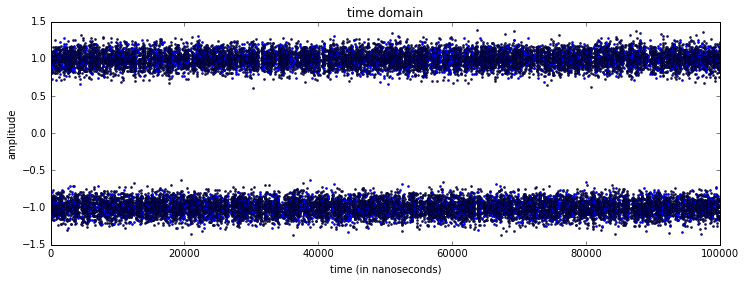

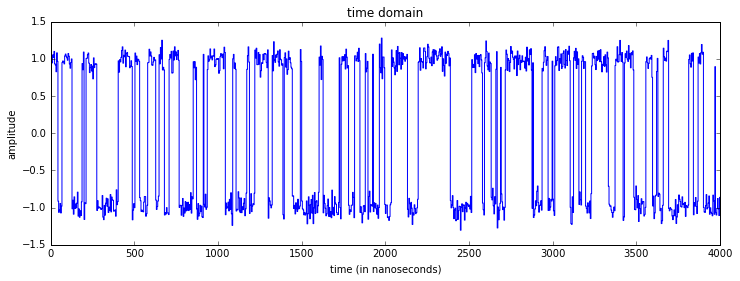

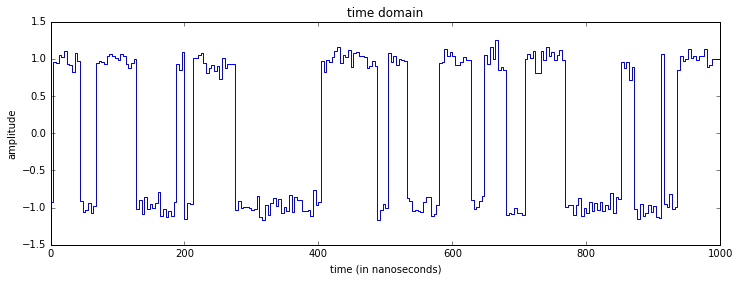

In [3]:
def RTN(N, scale=10, bi_sd=0):
    Y=np.random.exponential(scale=scale, size=N)
    X=np.round(Y)

    L=[]
    bi=-1 # set binary states
    j=0
    while len(L)<N:
        if X[j]>0:
            L.extend([bi]*int(X[j]))
            if bi==-1:
                bi=1
            else:
                bi=-1
        j+=1
    L=L[0:N]
    if bi_sd != 0:
        L = L + np.random.normal(0,bi_sd,N) # add white noise to bi-levels
    return L

print "Random Telegraph Noise (RTN) results"
RTNData=RTN(N, scale=10, bi_sd=0.1)
# print "DC:", findDC(RTNData)
plotNoise(time,RTNData)
plotNoiseStep(time[:4*k+1],RTNData[:4*k+1],title='time domain')
plotNoiseStep(time[:k+1],RTNData[:k+1],title='time domain')
plt.show()

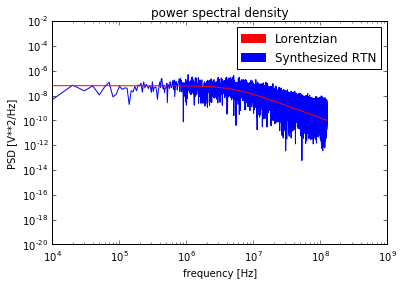

In [4]:
def plotData(data,title, ymin=1e-18, ymax=1e-10):
    fs = 1/4.0e-9
    f, Pxx_den = signal.periodogram(data, fs)
    plt.loglog(f, Pxx_den)
    plt.ylim([ymin, ymax])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title(title)
    plt.plot()
    
    
def plotLorentzianLine(T=0.001):
    f=np.arange(1,N//2)/(N*tau0*1e-9)
    PSD=3.2e-5*(1.0/T)/((f*N*tau0*1e-9)**2+(1.0/T)**2)
    plt.loglog(f,PSD,color='red')
    red = mpatches.Patch(color='red', label='Lorentzian')
    blue = mpatches.Patch(color='blue',label='Synthesized RTN')
    plt.legend(handles=[red,blue])
    plt.plot()

plotData(RTNData,'power spectral density', ymin=1e-20, ymax=1e-2)
plotLorentzianLine(50.0/N)
plt.show()

Graphs of the saved data of Random Telegraph Noise


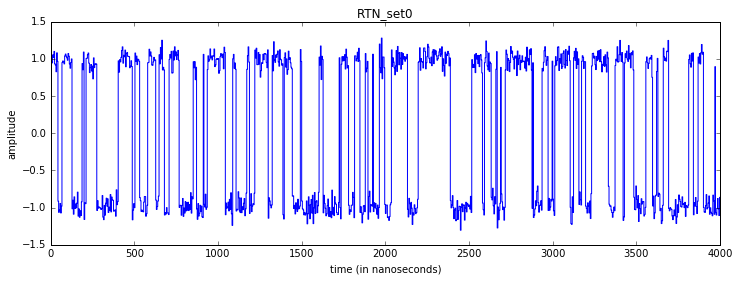

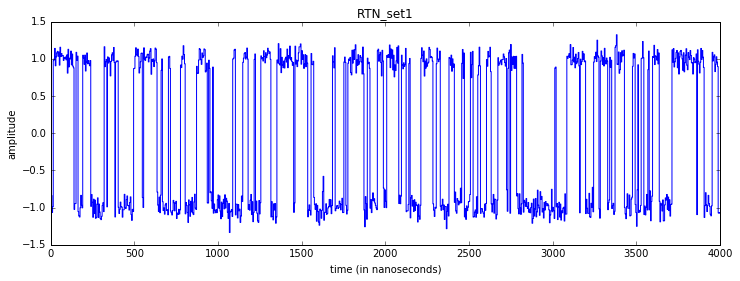

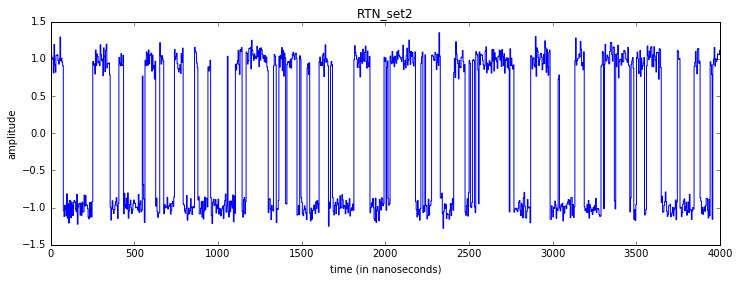

In [5]:
np.random.seed(1234)
if not os.path.isdir('./RTN_Data'):
    os.mkdir('./RTN_Data')
print 'Graphs of the saved data of Random Telegraph Noise'
for i in range(3):
    RTNData=RTN(N, scale=10, bi_sd=0.1)
    plotNoiseStep(time[:4*k+1],RTNData[:4*k+1],title="RTN_set"+str(i))
    np.savetxt("./RTN_Data/RTN_set"+str(i)+".txt", RTNData, delimiter=",")
plt.show()